In [2]:
import matplotlib.pyplot as plt
import scipy
from skimage import data
from skimage import filters
from skimage import draw
from skimage import exposure
from skimage import segmentation
from skimage import color
import PIL
import numpy as np
import os
print(os.getcwd())

1
[[ True False False  True False  True False False False  True  True  True
  False False  True  True  True False False  True  True False False  True]
 [ True  True False False  True False  True False False False  True  True
   True False False  True  True False  True False  True False False  True]
 [ True  True  True  True False False  True  True False False False  True
   True  True False False  True False  True False False  True  True  True]
 [False  True  True False False False False False  True  True False  True
   True  True  True False False False  True False False False  True  True]
 [False False  True False False False  True False  True  True  True False
  False  True  True  True False False False  True  True False False  True]
 [ True False False False  True  True  True False  True  True  True  True
  False False False  True  True False False  True  True  True False False]
 [ True False False False False  True  True False  True False  True  True
   True False False False  Tru

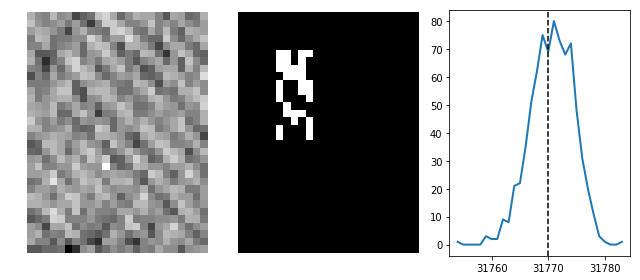

In [5]:
file_name = " test image path 098.png"
im = PIL.Image.open(file_name)
#im.show()
#only add cushion if difference in pixel intensity is not big
#Add image cushion of like 5 pixels. Also eliminate pixels right or left/top or bottom of diameters
#there are many other segmentation algorithms
camera = np.array(im)
new_array = camera[85:117:1, 221:245:1]
print(np.amin([1,1,2,3,1]))
camera = color.rgb2gray(new_array)

val = filters.threshold_otsu(camera)

hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
#print(camera)
#print(val)


new_arr = camera > val
print(new_arr)
#Set all rows above top boundary to false. We got 5 from 95(top boundary)-90(bbox start)
new_arr[:, :5] = False
new_arr[:, 10:] = False
#Set all rows below bottom boundary to false
new_arr[17:, :] = False
new_arr[:5, :] = False
#x Set
#new_arr[:10, :] = False

#new_arr[:5, :] = False
#new_arr[10:][:] = False

plt.imshow(new_arr, cmap='gray')

#plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')
plt.tight_layout()
#plt.show()